<a href="https://colab.research.google.com/github/givasSI/Desafio-Analise-de-dados/blob/main/AluraStoreBrasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [12]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

df_lojas = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

df_lojas.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Loja
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja 1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 1


In [13]:
df_lojas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Produto                 9435 non-null   object 
 1   Categoria do Produto    9435 non-null   object 
 2   Preço                   9435 non-null   float64
 3   Frete                   9435 non-null   float64
 4   Data da Compra          9435 non-null   object 
 5   Vendedor                9435 non-null   object 
 6   Local da compra         9435 non-null   object 
 7   Avaliação da compra     9435 non-null   int64  
 8   Tipo de pagamento       9435 non-null   object 
 9   Quantidade de parcelas  9435 non-null   int64  
 10  lat                     9435 non-null   float64
 11  lon                     9435 non-null   float64
 12  Loja                    9435 non-null   object 
dtypes: float64(4), int64(2), object(7)
memory usage: 958.4+ KB


In [14]:
df_lojas.isnull().sum()

,0
Produto,0
Categoria do Produto,0
Preço,0
Frete,0
Data da Compra,0
Vendedor,0
Local da compra,0
Avaliação da compra,0
Tipo de pagamento,0
Quantidade de parcelas,0


#1. Análise do faturamento



In [15]:
def calcular_faturamento_lojas_unificado(df_combinado):
    faturamento_por_loja = df_combinado.groupby('Loja')['Preço'].sum().reset_index()
    return faturamento_por_loja

In [16]:
faturamento_por_loja_df = calcular_faturamento_lojas_unificado(df_lojas)
print('Faturamento por Loja (usando DataFrame unificado):')
print(faturamento_por_loja_df)

Faturamento por Loja (usando DataFrame unificado):
     Loja       Preço
0  Loja 1  1534509.12
1  Loja 2  1488459.06
2  Loja 3  1464025.03
3  Loja 4  1384497.58


# 2. Vendas por Categoria

In [17]:
categoria_loja = df_lojas.groupby('Loja')['Categoria do Produto'].value_counts().reset_index(name='Contagem')

In [18]:
for loja_nome in categoria_loja['Loja'].unique():
    print(f'\nCategoria {loja_nome}:')
    print(categoria_loja[categoria_loja['Loja'] == loja_nome])


Categoria Loja 1:
     Loja   Categoria do Produto  Contagem
0  Loja 1                 moveis       465
1  Loja 1            eletronicos       448
2  Loja 1             brinquedos       324
3  Loja 1       eletrodomesticos       312
4  Loja 1        esporte e lazer       284
5  Loja 1  instrumentos musicais       182
6  Loja 1                 livros       173
7  Loja 1  utilidades domesticas       171

Categoria Loja 2:
      Loja   Categoria do Produto  Contagem
8   Loja 2                 moveis       442
9   Loja 2            eletronicos       422
10  Loja 2             brinquedos       313
11  Loja 2       eletrodomesticos       305
12  Loja 2        esporte e lazer       275
13  Loja 2  instrumentos musicais       224
14  Loja 2                 livros       197
15  Loja 2  utilidades domesticas       181

Categoria Loja 3:
      Loja   Categoria do Produto  Contagem
16  Loja 3                 moveis       499
17  Loja 3            eletronicos       451
18  Loja 3             brinq

# 3. Média de Avaliação das Lojas


In [19]:
media_avaliacao_por_loja = df_lojas.groupby('Loja')['Avaliação da compra'].mean().reset_index()
print('Média de avaliação por loja:')
print(media_avaliacao_por_loja)

Média de avaliação por loja:
     Loja  Avaliação da compra
0  Loja 1             3.976685
1  Loja 2             4.037304
2  Loja 3             4.048326
3  Loja 4             3.995759


In [20]:
medias_avaliacoes = media_avaliacao_por_loja['Avaliação da compra'].tolist()

for i, media in enumerate(medias_avaliacoes):
  print(f'Média de avaliação loja {i+1}: {media:.2f}')

Média de avaliação loja 1: 3.98
Média de avaliação loja 2: 4.04
Média de avaliação loja 3: 4.05
Média de avaliação loja 4: 4.00


# 4. Produtos Mais e Menos Vendidos

In [21]:
for loja_nome in df_lojas['Loja'].unique():
    df_loja = df_lojas[df_lojas['Loja'] == loja_nome]

    # Produto mais vendido na Loja
    produto_mais_vendido = df_loja['Produto'].value_counts().idxmax()
    quantidade_mais_vendido = df_loja['Produto'].value_counts().max()

    # Produto menos vendido na Loja
    produto_menos_vendido = df_loja['Produto'].value_counts().idxmin()
    quantidade_menos_vendido = df_loja['Produto'].value_counts().min()

    print(f"Na {loja_nome}, o produto mais vendido foi: '{produto_mais_vendido}' com {quantidade_mais_vendido} unidades.")
    print(f"Na {loja_nome}, o produto menos vendido foi: '{produto_menos_vendido}' com {quantidade_menos_vendido} unidades.\n")

Na Loja 1, o produto mais vendido foi: 'Micro-ondas' com 60 unidades.
Na Loja 1, o produto menos vendido foi: 'Headset' com 33 unidades.

Na Loja 2, o produto mais vendido foi: 'Iniciando em programação' com 65 unidades.
Na Loja 2, o produto menos vendido foi: 'Jogo de tabuleiro' com 32 unidades.

Na Loja 3, o produto mais vendido foi: 'Kit banquetas' com 57 unidades.
Na Loja 3, o produto menos vendido foi: 'Blocos de montar' com 35 unidades.

Na Loja 4, o produto mais vendido foi: 'Cama box' com 62 unidades.
Na Loja 4, o produto menos vendido foi: 'Guitarra' com 33 unidades.



In [22]:
contagem_total = df_lojas['Produto'].value_counts()

produto_mais_vendido_geral = contagem_total.idxmax()
quantidade_mais_vendido_geral = contagem_total.max()
produto_menos_vendido_geral = contagem_total.idxmin()
quantidade_menos_vendido_geral = contagem_total.min()

print(f"O produto mais vendido foi: '{produto_mais_vendido_geral}' com {quantidade_mais_vendido_geral} unidades.")
print(f"O produto menos vendido foi: '{produto_menos_vendido_geral}' com {quantidade_menos_vendido_geral} unidades.")

O produto mais vendido foi: 'Cômoda' com 210 unidades.
O produto menos vendido foi: 'Celular ABXY' com 157 unidades.


# 5. Frete Médio por Loja

In [23]:
media_de_frete_por_loja = df_lojas.groupby('Loja')['Frete'].mean().reset_index()
print('Média de Frete por Loja:')
print(media_de_frete_por_loja)

Média de Frete por Loja:
     Loja      Frete
0  Loja 1  34.691805
1  Loja 2  33.621941
2  Loja 3  33.074464
3  Loja 4  31.278997


#6. Graficos

##Importação das bibliotecas

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

##Grafico de faturamento

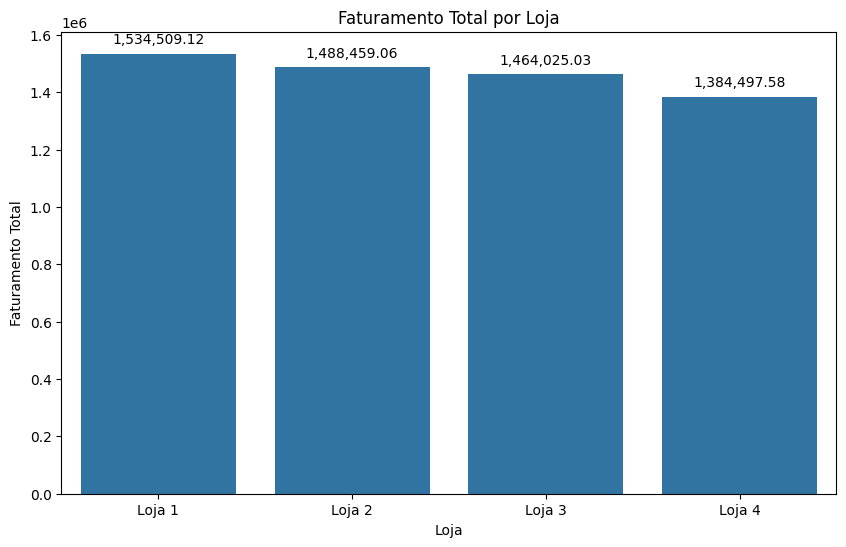

In [25]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Loja', y='Preço', data=faturamento_por_loja_df)
plt.title('Faturamento Total por Loja')
plt.xlabel('Loja')
plt.ylabel('Faturamento Total')

for p in ax.patches:
    ax.annotate(f'{p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

##Média de Avaliação por Loja

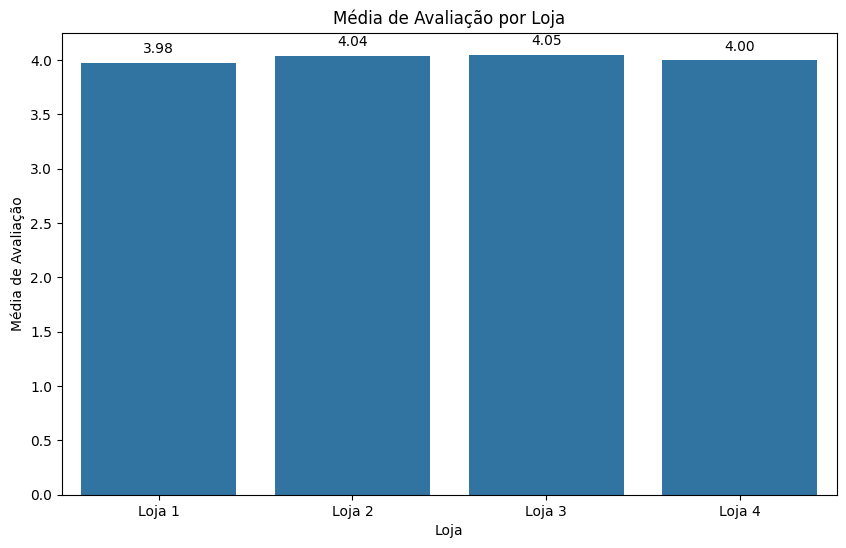

In [26]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Loja', y='Avaliação da compra', data=media_avaliacao_por_loja)
plt.title('Média de Avaliação por Loja')
plt.xlabel('Loja')
plt.ylabel('Média de Avaliação')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

##Grafico de Frete Médio por Loja

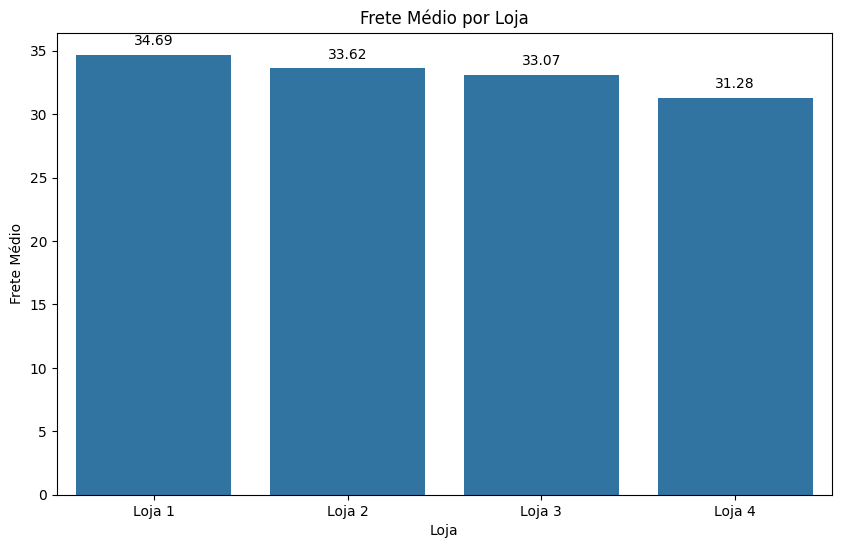

In [27]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Loja', y='Frete', data=media_de_frete_por_loja)
plt.title('Frete Médio por Loja')
plt.xlabel('Loja')
plt.ylabel('Frete Médio')

for p in ax.patches:
    ax.annotate(f'{p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

##Distribuição de Vendas por Categorias

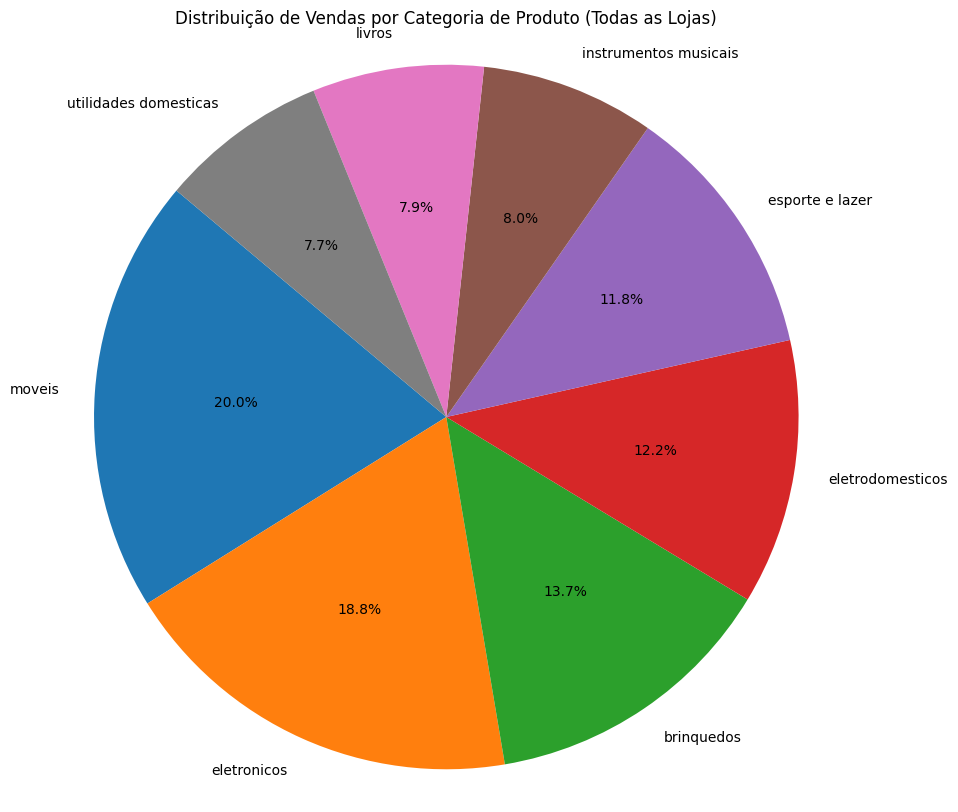

In [28]:
vendas_por_categoria = df_lojas['Categoria do Produto'].value_counts()

plt.figure(figsize=(10, 10))
plt.pie(vendas_por_categoria, labels=vendas_por_categoria.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de Vendas por Categoria de Produto (Todas as Lojas)')
plt.axis('equal') # Garante que o gráfico de pizza seja desenhado como um círculo.
plt.show()

#Investigando por que a Loja 1 tem a pior avaliação apesar do maior faturamento

##Análise por Tipo de Pagamento

In [29]:
# Verificar se há relação entre tipo de pagamento e avaliação
pagamento_avaliacao = df_lojas.groupby(['Loja', 'Tipo de pagamento'])['Avaliação da compra'].mean().reset_index()
print(pagamento_avaliacao)

      Loja Tipo de pagamento  Avaliação da compra
0   Loja 1            boleto             4.097308
1   Loja 1    cartao_credito             3.958920
2   Loja 1     cartao_debito             4.171429
3   Loja 1             cupom             3.722628
4   Loja 2            boleto             4.064240
5   Loja 2    cartao_credito             4.030796
6   Loja 2     cartao_debito             4.166667
7   Loja 2             cupom             4.000000
8   Loja 3            boleto             4.083333
9   Loja 3    cartao_credito             4.030234
10  Loja 3     cartao_debito             3.945946
11  Loja 3             cupom             4.237624
12  Loja 4            boleto             4.074689
13  Loja 4    cartao_credito             3.970349
14  Loja 4     cartao_debito             4.354839
15  Loja 4             cupom             3.952000


##Análise por Categoria:

In [30]:
# Verificar avaliação por categoria na Loja 1
categoria_avaliacao_loja1 = df_lojas[df_lojas['Loja'] == 'Loja 1'].groupby('Categoria do Produto')['Avaliação da compra'].mean().sort_values()
print(categoria_avaliacao_loja1)

Categoria do Produto
utilidades domesticas    3.748538
esporte e lazer          3.897887
moveis                   3.946237
livros                   3.976879
eletronicos              4.004464
eletrodomesticos         4.032051
instrumentos musicais    4.049451
brinquedos               4.077160
Name: Avaliação da compra, dtype: float64


##Análise por Preço:

In [31]:
# Dividir em faixas de preço e verificar avaliação
df_lojas['Faixa Preço'] = pd.cut(df_lojas['Preço'], bins=[0, 100, 500, 1000, 2000, 4000])
faixa_avaliacao_loja1 = df_lojas[df_lojas['Loja'] == 'Loja 1'].groupby('Faixa Preço')['Avaliação da compra'].mean()
print(faixa_avaliacao_loja1)

Faixa Preço
(0, 100]        3.967700
(100, 500]      3.944767
(500, 1000]     4.017677
(1000, 2000]    3.983051
(2000, 4000]    4.029126
Name: Avaliação da compra, dtype: float64


/tmp/ipython-input-3529003117.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  faixa_avaliacao_loja1 = df_lojas[df_lojas['Loja'] == 'Loja 1'].groupby('Faixa Preço')['Avaliação da compra'].mean()


##Análise de Vendedores:

In [32]:
# Verificar desempenho dos vendedores da Loja 1
vendedor_avaliacao_loja1 = df_lojas[df_lojas['Loja'] == 'Loja 1'].groupby('Vendedor').agg({
    'Avaliação da compra': 'mean',
    'Produto': 'count'
}).sort_values('Avaliação da compra')
print(vendedor_avaliacao_loja1)

                  Avaliação da compra  Produto
Vendedor                                      
Thiago Silva                 3.751269      197
João Souza                   3.852761      163
Larissa Alves                3.884393      173
Lucas Oliveira               3.933735      166
Pedro Gomes                  3.940828      169
Camila Ribeiro               3.946108      167
Juliana Costa                3.982249      169
Bianca Santos                3.988889      180
Mariana Ferreira             4.000000      156
Beatriz Moraes               4.024242      165
Felipe Santos                4.041176      170
Isabella Pereira             4.055556      144
Rafael Costa                 4.070175      171
Bruno Rodrigues              4.248521      169


##Análise de Parcelamento:

In [33]:
# Verificar se número de parcelas afeta avaliação
parcelas_avaliacao_loja1 = df_lojas[df_lojas['Loja'] == 'Loja 1'].groupby('Quantidade de parcelas')['Avaliação da compra'].mean()
print(parcelas_avaliacao_loja1)

Quantidade de parcelas
1     4.050664
2     3.875486
3     4.000000
4     3.782313
5     3.961832
6     4.000000
7     3.950000
8     3.906250
9     4.454545
10    3.669014
11    4.000000
12    4.300000
14    5.000000
18    5.000000
24    4.000000
Name: Avaliação da compra, dtype: float64


##Detectar Produtos Problemáticos:

In [34]:
# Encontrar produtos com avaliações baixas na Loja 1
produtos_ruins_loja1 = df_lojas[
    (df_lojas['Loja'] == 'Loja 1') &
    (df_lojas['Avaliação da compra'] <= 2)
].groupby('Produto').agg({
    'Avaliação da compra': ['mean', 'count']
})
print(produtos_ruins_loja1.sort_values(('Avaliação da compra', 'mean')))

                            Avaliação da compra      
                                           mean count
Produto                                              
Corda de pular                         1.000000     9
Copo térmico                           1.000000     7
Cama king                              1.000000     9
Fogão                                  1.000000     4
Pandeiro                               1.000000     6
Jogo de copos                          1.062500    16
Modelagem preditiva                    1.090909    11
Guarda roupas                          1.090909    11
Geladeira                              1.111111     9
Dashboards com Power BI                1.125000     8
Celular Plus X42                       1.125000     8
Dinossauro Rex                         1.125000     8
Jogo de tabuleiro                      1.125000     8
Cadeira de escritório                  1.125000     8
Headset                                1.142857     7
Fone de ouvido              

#Analisar se o frete alto da Loja 1 está afetando as vendas

##Correlação entre Frete e Avaliação:

In [35]:
import scipy.stats as stats

# Calcular correlação para cada loja
correlacoes = {}
for loja in df_lojas['Loja'].unique():
    df_loja = df_lojas[df_lojas['Loja'] == loja]
    correlacao, p_valor = stats.pearsonr(df_loja['Frete'], df_loja['Avaliação da compra'])
    correlacoes[loja] = {'correlacao': correlacao, 'p_valor': p_valor}

print("Correlação Frete x Avaliação por Loja:")
for loja, valores in correlacoes.items():
    print(f"{loja}: Correlação = {valores['correlacao']:.3f}, P-valor = {valores['p_valor']:.3f}")

Correlação Frete x Avaliação por Loja:
Loja 1: Correlação = 0.019, P-valor = 0.347
Loja 2: Correlação = 0.008, P-valor = 0.691
Loja 3: Correlação = -0.006, P-valor = 0.753
Loja 4: Correlação = -0.020, P-valor = 0.341


##Comparar Frete por Categoria entre Lojas:

In [ ]:
# Comparar frete médio por categoria entre lojas
frete_categoria = df_lojas.groupby(['Loja', 'Categoria do Produto'])['Frete'].mean().unstack()
print(frete_categoria)

# Calcular diferença percentual
frete_loja1 = frete_categoria.loc['Loja 1']
frete_outras = frete_categoria.loc[['Loja 2', 'Loja 3', 'Loja 4']].mean()
diferenca_percentual = ((frete_loja1 - frete_outras) / frete_outras * 100)
print("\nDiferença percentual do frete da Loja 1 vs média das outras:")
print(diferenca_percentual.sort_values(ascending=False))

##Análise de Frete vs Preço do Produto:

In [36]:
# Calcular percentual do frete em relação ao preço
df_lojas['Frete_Percentual'] = (df_lojas['Frete'] / df_lojas['Preço']) * 100

# Comparar por loja
frete_percentual_por_loja = df_lojas.groupby('Loja')['Frete_Percentual'].mean()
print("Percentual médio do frete em relação ao preço:")
print(frete_percentual_por_loja.sort_values(ascending=False))

# Verificar se frete percentual alto afeta avaliação
df_lojas['Faixa_Frete_Percentual'] = pd.cut(df_lojas['Frete_Percentual'],
                                            bins=[0, 5, 10, 20, 50, 100, float('inf')])
avaliacao_frete_percentual = df_lojas.groupby(['Loja', 'Faixa_Frete_Percentual'])['Avaliação da compra'].mean().unstack()
print("\nAvaliação por faixa de percentual do frete:")
print(avaliacao_frete_percentual)

Percentual médio do frete em relação ao preço:
Loja
Loja 2    5.607853
Loja 4    5.541432
Loja 1    5.523175
Loja 3    5.373366
Name: Frete_Percentual, dtype: float64

Avaliação por faixa de percentual do frete:
Faixa_Frete_Percentual  (0.0, 5.0]  (5.0, 10.0]  (10.0, 20.0]  (20.0, 50.0]  \
Loja                                                                          
Loja 1                    4.015534     3.949769      4.096386      4.138889   
Loja 2                    4.061630     4.026903      3.975000      4.161290   
Loja 3                    4.104508     4.032526      3.876712      4.380952   
Loja 4                    4.032389     3.950968      4.259259      3.888889   

Faixa_Frete_Percentual  (50.0, 100.0]  (100.0, inf]  
Loja                                                 
Loja 1                       3.333333           NaN  
Loja 2                       4.000000           NaN  
Loja 3                       5.000000           NaN  
Loja 4                       3.000000      

/tmp/ipython-input-2183803671.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avaliacao_frete_percentual = df_lojas.groupby(['Loja', 'Faixa_Frete_Percentual'])['Avaliação da compra'].mean().unstack()


##Análise de Vendas por Faixa de Frete:

In [37]:
# Criar faixas de frete
df_lojas['Faixa_Frete'] = pd.cut(df_lojas['Frete'], bins=[0, 20, 40, 60, 100, float('inf')])

# Contar vendas por faixa de frete em cada loja
vendas_por_frete = df_lojas.groupby(['Loja', 'Faixa_Frete']).size().unstack()
print("Quantidade de vendas por faixa de frete:")
print(vendas_por_frete)

# Calcular percentual de vendas por faixa
vendas_por_frete_percentual = vendas_por_frete.div(vendas_por_frete.sum(axis=1), axis=0) * 100
print("\nPercentual de vendas por faixa de frete:")
print(vendas_por_frete_percentual)

Quantidade de vendas por faixa de frete:
Faixa_Frete  (0.0, 20.0]  (20.0, 40.0]  (40.0, 60.0]  (60.0, 100.0]  \
Loja                                                                  
Loja 1              1089           372           235            215   
Loja 2              1103           351           239            226   
Loja 3              1122           351           222            237   
Loja 4              1192           333           223            209   

Faixa_Frete  (100.0, inf]  
Loja                       
Loja 1                239  
Loja 2                226  
Loja 3                219  
Loja 4                205  

Percentual de vendas por faixa de frete:
Faixa_Frete  (0.0, 20.0]  (20.0, 40.0]  (40.0, 60.0]  (60.0, 100.0]  \
Loja                                                                  
Loja 1         50.651163     17.302326     10.930233      10.000000   
Loja 2         51.421911     16.363636     11.142191      10.536131   
Loja 3         52.161785     16.317992

/tmp/ipython-input-1563647660.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vendas_por_frete = df_lojas.groupby(['Loja', 'Faixa_Frete']).size().unstack()


##Análise de Localização:

In [38]:
# Verificar se há relação entre local da compra e frete
frete_local = df_lojas.groupby(['Loja', 'Local da compra'])['Frete'].mean().unstack()
print("Frete médio por local da compra:")
print(frete_local)

# Verificar se locais com frete mais alto têm menos vendas
vendas_local = df_lojas.groupby(['Loja', 'Local da compra']).size().unstack()
print("\nVendas por local da compra:")
print(vendas_local)

Frete médio por local da compra:
Local da compra          AC         AL         AM         AP         BA  \
Loja                                                                      
Loja 1           123.838510  38.839121  25.022479  16.491483  31.610737   
Loja 2             3.438413  17.973244  18.744558        NaN  24.880383   
Loja 3            20.807050  65.197304  61.232711  10.837882  33.936673   
Loja 4                  NaN  15.160009  19.353759  35.724770  30.689071   

Local da compra         CE         DF         ES         GO         MA  ...  \
Loja                                                                    ...   
Loja 1           30.121490  30.168740  25.961912  53.505762  22.300109  ...   
Loja 2           24.833420  21.572765  25.134240  35.098204  38.000813  ...   
Loja 3           20.055999  43.553631  44.635088  40.140614  29.233675  ...   
Loja 4           26.733723  27.887606  30.759104  16.449060  45.662141  ...   

Local da compra         PR         RJ    

##Teste de Hipótese:

In [39]:
from scipy.stats import ttest_ind

# Testar se há diferença significativa nas avaliações quando o frete é alto vs baixo
df_loja1 = df_lojas[df_lojas['Loja'] == 'Loja 1']
alto_frete = df_loja1[df_loja1['Frete'] > df_loja1['Frete'].median()]['Avaliação da compra']
baixo_frete = df_loja1[df_loja1['Frete'] <= df_loja1['Frete'].median()]['Avaliação da compra']

t_stat, p_valor = ttest_ind(alto_frete, baixo_frete)
print(f"Teste t para Loja 1 - Frete alto vs baixo:")
print(f"Estatística t: {t_stat:.3f}")
print(f"P-valor: {p_valor:.3f}")
if p_valor < 0.05:
    print("Diferença significativa (frete afeta avaliação)")
else:
    print("Sem diferença significativa")

Teste t para Loja 1 - Frete alto vs baixo:
Estatística t: 0.421
P-valor: 0.673
Sem diferença significativa


##Visualizações Adicionais:

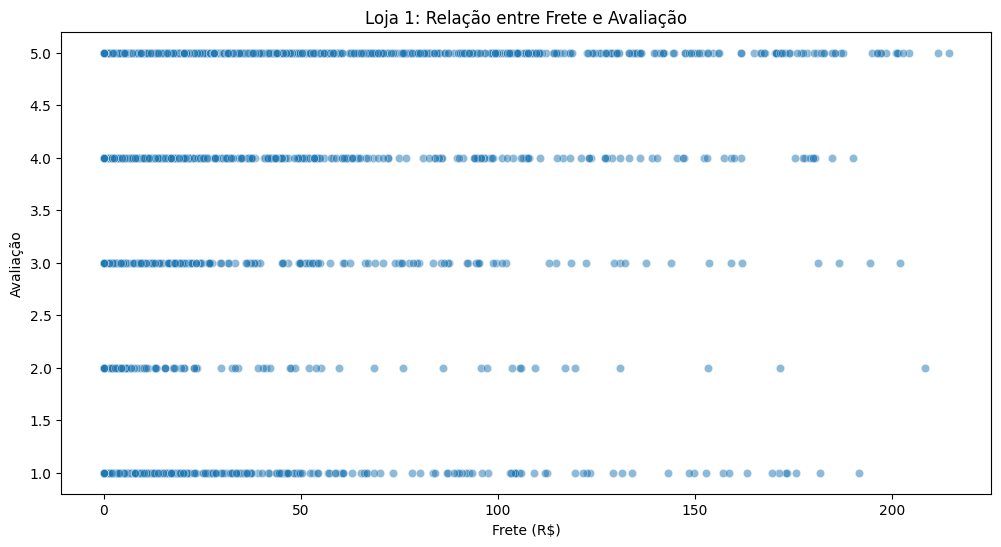

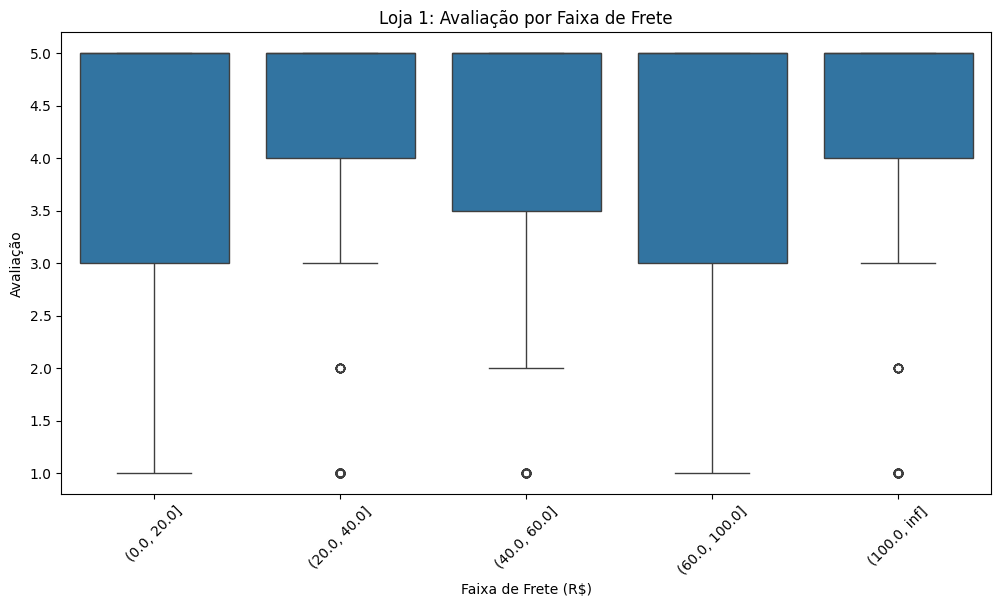

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico: Avaliação vs Frete (Loja 1)
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_lojas[df_lojas['Loja'] == 'Loja 1'],
                x='Frete', y='Avaliação da compra', alpha=0.5)
plt.title('Loja 1: Relação entre Frete e Avaliação')
plt.xlabel('Frete (R$)')
plt.ylabel('Avaliação')
plt.show()

# Gráfico: Distribuição de avaliações por faixa de frete
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_lojas[df_lojas['Loja'] == 'Loja 1'],
            x='Faixa_Frete', y='Avaliação da compra')
plt.title('Loja 1: Avaliação por Faixa de Frete')
plt.xlabel('Faixa de Frete (R$)')
plt.ylabel('Avaliação')
plt.xticks(rotation=45)
plt.show()